## Análise Exploratória##

O intuito desse trabalho é elaborar uma regressão linear capaz de prever o número total de unidades vendidades de um game, com base em certas características dele. Para isso, é utilizado um dataset contendo diversos jogos, junto de seu ano de lançamento, gênero, numero total de vendas, publisher, entre outros.

In [262]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import re

Começamos importando o arquivo csv que contém o dataset. Além disso, selecionamos somente as categorias que nos interessam. Dessa forma, excluimos as vendas em regiões específicas, já que nosso objetivo é somente prever suas vendas globais. Quanto aos critérios referentes à avaliação dos jogos, mantivemos somente a nota da crítica especializada.
Após feito isso, removemos as colunas contendo "Nan", de modo a aumentar a acurácia da análise.

In [339]:
dados =  pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
dados_filtrado = dados.loc[:, ["Name", "Platform","Year_of_Release","Genre","Publisher","Global_Sales","Critic_Score"]].dropna()


Tendo feito isso, separamos os jogos lançados a partir de 2013 do restante do grupo, de modo a conseguir um conjunto de dados mais coerente com o momento atual:

In [264]:
#gêneros
#Sports; Role-Playing; Misc; Racing; Platform; Puzzle; Shooter; Simulation; Action; Fighting; Adventure; 

In [265]:
dados_2013 =dados_filtrado[dados_filtrado.Year_of_Release>=2013]
dados_2013


,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,21.04,97.0
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,16.27,97.0
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,12.61,97.0
60,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,10.25,73.0
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,Activision,9.36,71.0
77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,8.57,82.0
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,7.66,83.0
94,FIFA 17,PS4,2016.0,Sports,Electronic Arts,7.59,85.0
105,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,7.16,87.0
110,Mario Kart 8,WiiU,2014.0,Racing,Nintendo,7.09,88.0


Logo em seguida, separamos o dataset por gênero, para ver como varia o número de vendas do jogo de acordo com essa variável:

In [340]:
#Sports

esportes = dados_2013[dados_2013.Genre== 'Sports']


In [341]:
#rpg

rpg = dados_2013[dados_2013.Genre == 'Role-Playing']


In [342]:
#música
music = dados_2013[dados_2013.Genre == 'Misc']


In [343]:
corrida = dados_2013[dados_2013.Genre=='Racing']


In [344]:
plataforma = dados_2013[dados_2013.Genre == 'Platform']


In [351]:
estrategia = dados_2013[dados_2013.Genre == 'Strategy']


In [271]:
quebra_cabeca = dados_2013[dados_2013.Genre == 'Puzzle']
quebra_cabeca

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score
1691,Captain Toad: Treasure Tracker,WiiU,2014.0,Puzzle,Nintendo,1.19,81.0
2714,Professor Layton and the Azran Legacy,3DS,2013.0,Puzzle,Nintendo,0.75,81.0
10568,Scribblenauts Unmasked: A DC Comics Adventure,WiiU,2013.0,Puzzle,Warner Bros. Interactive Entertainment,0.10,71.0
10592,Scribblenauts Unmasked: A DC Comics Adventure,3DS,2013.0,Puzzle,Warner Bros. Interactive Entertainment,0.10,68.0
12334,Mario vs. Donkey Kong: Tipping Stars,3DS,2015.0,Puzzle,Nintendo,0.06,70.0
14710,The Talos Principle,PS4,2015.0,Puzzle,Devolver Digital,0.03,88.0
16424,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.01,70.0


In [345]:
tiro = dados_2013[dados_2013.Genre== 'Shooter']


In [346]:
simulacao = dados_2013[dados_2013.Genre == 'Simulation']


In [347]:
acao = dados_2013[dados_2013.Genre == 'Action']


In [348]:
luta = dados_2013[dados_2013.Genre =='Fighting']


In [349]:
aventura = dados_2013[dados_2013.Genre ==  'Adventure']


## Avaliação de vendas ##
Para "avaliar" cada gênero de maneira mais específica, utilizamos a ferramenta "describe()", que nos mostra os percentis de cada dataset, seu valor máximo visto, sua média, dentre outros. Além disso, utilizamos um bloxplot evidenciar o "comportamento" das vendas e calculamos o total de unidades vendidas.

In [277]:

aventura['Global_Sales'].describe()


count    47.000000
mean      0.214681
std       0.395045
min       0.010000
25%       0.030000
50%       0.070000
75%       0.135000
max       1.660000
Name: Global_Sales, dtype: float64

In [278]:
vendas_aventura = sum(aventura['Global_Sales'])
vendas_aventura

10.089999999999995

{'boxes': [<matplotlib.lines.Line2D at 0x1a8a81d20f0>],
 'caps': [<matplotlib.lines.Line2D at 0x1a8a81d2b00>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a8a81d97b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a8a81d9390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a8a81d2240>,
  <matplotlib.lines.Line2D at 0x1a8a81d26d8>]}

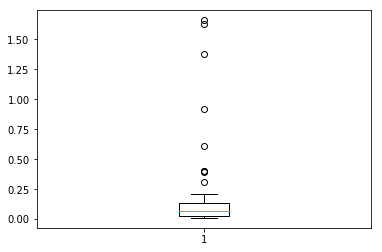

In [279]:
plt.boxplot(aventura["Global_Sales"])

In [280]:
luta['Global_Sales'].describe()

count    42.000000
mean      0.423810
std       0.549097
min       0.020000
25%       0.082500
50%       0.190000
75%       0.490000
max       2.780000
Name: Global_Sales, dtype: float64

In [281]:
vendas_luta = sum(luta['Global_Sales'])
vendas_luta

17.799999999999997

{'boxes': [<matplotlib.lines.Line2D at 0x1a8a822bc18>],
 'caps': [<matplotlib.lines.Line2D at 0x1a8a8235668>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a8a823e320>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a8a8235eb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a8a822bd68>,
  <matplotlib.lines.Line2D at 0x1a8a8235240>]}

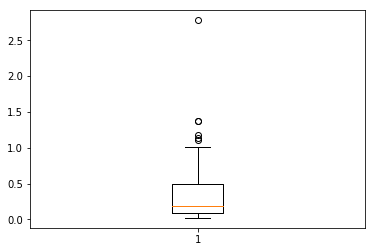

In [282]:
plt.boxplot(luta["Global_Sales"])

In [283]:
acao['Global_Sales'].describe()

count    313.000000
mean       0.741565
std        1.852280
min        0.010000
25%        0.080000
50%        0.210000
75%        0.670000
max       21.040000
Name: Global_Sales, dtype: float64

In [284]:
vendas_acao = sum(acao['Global_Sales'])
vendas_acao

232.10999999999987

{'boxes': [<matplotlib.lines.Line2D at 0x1a8a8297358>],
 'caps': [<matplotlib.lines.Line2D at 0x1a8a8297d68>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a8a829fa20>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a8a829f5f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a8a82974a8>,
  <matplotlib.lines.Line2D at 0x1a8a8297940>]}

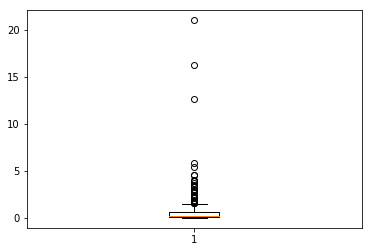

In [285]:
plt.boxplot(acao["Global_Sales"])

In [286]:
simulacao['Global_Sales'].describe()

count    28.000000
mean      0.436429
std       0.790242
min       0.010000
25%       0.075000
50%       0.140000
75%       0.387500
max       3.050000
Name: Global_Sales, dtype: float64

In [287]:
vendas_simulacao = sum(simulacao['Global_Sales'])
vendas_simulacao

12.219999999999999

{'boxes': [<matplotlib.lines.Line2D at 0x1a8a82f5550>],
 'caps': [<matplotlib.lines.Line2D at 0x1a8a82f5f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a8a82fcc18>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a8a82fc7f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a8a82f56a0>,
  <matplotlib.lines.Line2D at 0x1a8a82f5b38>]}

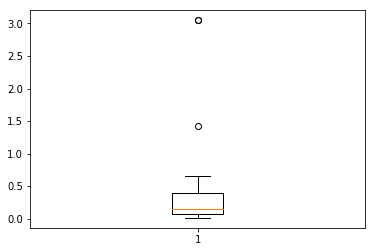

In [288]:
plt.boxplot(simulacao["Global_Sales"])

In [289]:
tiro['Global_Sales'].describe()

count    134.000000
mean       1.276567
std        1.783085
min        0.010000
25%        0.192500
50%        0.570000
75%        1.615000
max       10.250000
Name: Global_Sales, dtype: float64

In [290]:
vendas_tiro= sum(tiro['Global_Sales'])
vendas_tiro

171.0600000000001

{'boxes': [<matplotlib.lines.Line2D at 0x1a8a835d048>],
 'caps': [<matplotlib.lines.Line2D at 0x1a8a835da58>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a8a8366710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a8a83662e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a8a835d198>,
  <matplotlib.lines.Line2D at 0x1a8a835d630>]}

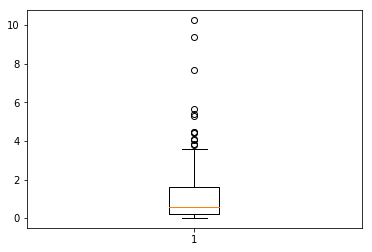

In [291]:
plt.boxplot(tiro["Global_Sales"])

In [292]:
quebra_cabeca['Global_Sales'].describe()

count    7.000000
mean     0.320000
std      0.463033
min      0.010000
25%      0.045000
50%      0.100000
75%      0.425000
max      1.190000
Name: Global_Sales, dtype: float64

In [293]:
vendas_quebra_cabeca= sum(quebra_cabeca['Global_Sales'])
vendas_quebra_cabeca

2.2399999999999998

{'boxes': [<matplotlib.lines.Line2D at 0x1a8a83bc4a8>],
 'caps': [<matplotlib.lines.Line2D at 0x1a8a83bceb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a8a83c4b70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a8a83c4748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a8a83bc5f8>,
  <matplotlib.lines.Line2D at 0x1a8a83bca90>]}

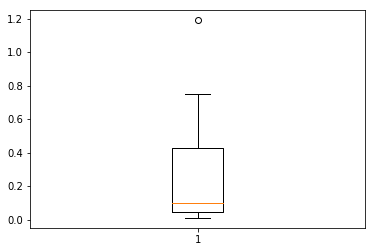

In [294]:
plt.boxplot(quebra_cabeca["Global_Sales"])

In [295]:
plataforma['Global_Sales'].describe()

count    51.000000
mean      0.631569
std       0.868270
min       0.010000
25%       0.085000
50%       0.260000
75%       0.835000
max       4.320000
Name: Global_Sales, dtype: float64

In [296]:
vendas_plataforma= sum(plataforma['Global_Sales'])
vendas_plataforma

32.209999999999994

{'boxes': [<matplotlib.lines.Line2D at 0x1a8a84220b8>],
 'caps': [<matplotlib.lines.Line2D at 0x1a8a8422ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a8a842a780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a8a842a358>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a8a8422208>,
  <matplotlib.lines.Line2D at 0x1a8a84226a0>]}

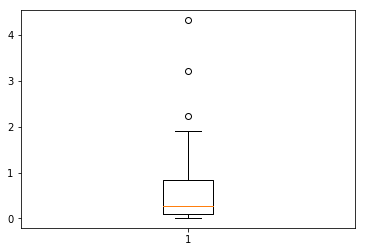

In [297]:
plt.boxplot(plataforma["Global_Sales"])

In [298]:
corrida['Global_Sales'].describe()

count    61.000000
mean      0.561311
std       1.082345
min       0.010000
25%       0.050000
50%       0.170000
75%       0.540000
max       7.090000
Name: Global_Sales, dtype: float64

In [299]:
vendas_corrida= sum(corrida['Global_Sales'])
vendas_corrida

34.240000000000016

{'boxes': [<matplotlib.lines.Line2D at 0x1a8a8476f98>],
 'caps': [<matplotlib.lines.Line2D at 0x1a8a84819e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a8a848c6a0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a8a848c278>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a8a8481128>,
  <matplotlib.lines.Line2D at 0x1a8a84815c0>]}

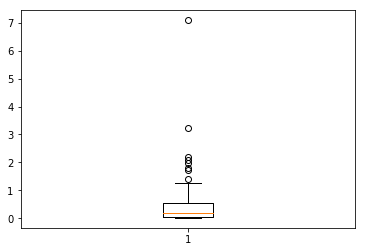

In [300]:
plt.boxplot(corrida["Global_Sales"])

In [301]:
music['Global_Sales'].describe()

count    43.000000
mean      0.451163
std       0.421303
min       0.010000
25%       0.190000
50%       0.330000
75%       0.510000
max       1.920000
Name: Global_Sales, dtype: float64

In [302]:
vendas_musica= sum(music['Global_Sales'])
vendas_musica

19.400000000000013

{'boxes': [<matplotlib.lines.Line2D at 0x1a8a84dfd68>],
 'caps': [<matplotlib.lines.Line2D at 0x1a8a84ea7b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a8a84f1470>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a8a84f1048>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a8a84dfeb8>,
  <matplotlib.lines.Line2D at 0x1a8a84ea390>]}

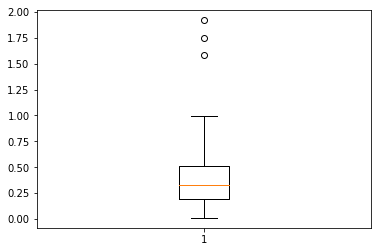

In [303]:
plt.boxplot(music["Global_Sales"])

In [304]:
rpg['Global_Sales'].describe()

count    127.000000
mean       0.481496
std        0.917314
min        0.010000
25%        0.070000
50%        0.190000
75%        0.460000
max        7.160000
Name: Global_Sales, dtype: float64

In [305]:
vendas_rpg= sum(rpg['Global_Sales'])
vendas_rpg

61.15000000000003

{'boxes': [<matplotlib.lines.Line2D at 0x1a8a8553278>],
 'caps': [<matplotlib.lines.Line2D at 0x1a8a8553c88>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a8a855b940>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a8a855b518>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a8a85533c8>,
  <matplotlib.lines.Line2D at 0x1a8a8553860>]}

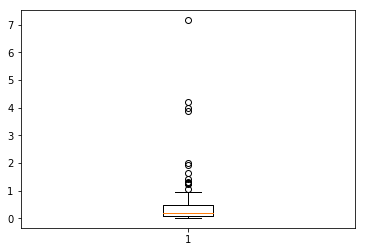

In [306]:
plt.boxplot(rpg["Global_Sales"])

In [307]:
esportes['Global_Sales'].describe()

count    112.000000
mean       1.027946
std        1.497596
min        0.010000
25%        0.135000
50%        0.510000
75%        1.142500
max        8.570000
Name: Global_Sales, dtype: float64

In [308]:
vendas_esportes=sum(esportes['Global_Sales'])
vendas_esportes

115.13000000000004

{'boxes': [<matplotlib.lines.Line2D at 0x1a8a85b9080>],
 'caps': [<matplotlib.lines.Line2D at 0x1a8a85b9a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a8a85c1748>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a8a85c1320>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a8a85b91d0>,
  <matplotlib.lines.Line2D at 0x1a8a85b9668>]}

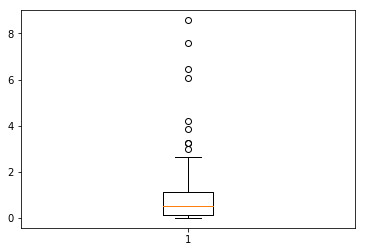

In [309]:
plt.boxplot(esportes["Global_Sales"])

In [352]:
estrategia['Global_Sales'].describe()

count    26.000000
mean      0.286538
std       0.373898
min       0.010000
25%       0.050000
50%       0.210000
75%       0.287500
max       1.670000
Name: Global_Sales, dtype: float64

In [353]:
vendas_stra=sum(estrategia['Global_Sales'])
vendas_stra

7.45

{'boxes': [<matplotlib.lines.Line2D at 0x1a8a8873208>],
 'caps': [<matplotlib.lines.Line2D at 0x1a8a8873c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a8a88798d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a8a88794a8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a8a8873358>,
  <matplotlib.lines.Line2D at 0x1a8a88737f0>]}

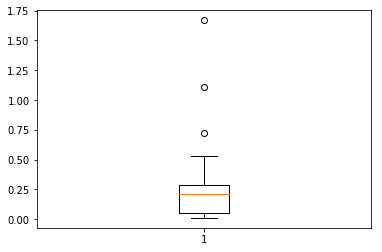

In [354]:
plt.boxplot(estrategia["Global_Sales"])

Após realizar esses métodos, foi possível notar que há gêneros mais populares entre o público, feito os jogos de tiro e de ação. Contudo, todos os cenários possuem um comportamento em comum. No caso, é possível visualizar que o mercado sempre é composto por vários jogos de venda baixa e poucos de vendas altas (outliers), quando comparadas com o todo. Dessa forma, esses outliers elevam o valor da média, mas a médiana e os percentis continuam baixos. 

## Títulos de uma Publisher por faixa de preço


De modo a descobrir se os jogos de uma determinada publisher possuem maior predisposição para vendas, decidiu-se contar quantos jogos cada uma possui ao todo e verificar como esse número se altera de acordo com a faixa de vendas analisada. Além disso, foram avaliadas as vendas de cada empresa em um determinado gênero e quanto elas representam de todo o mercado. 

Verificamos o número de jogos de cada publisher:

In [320]:
dados_2013['Publisher'].value_counts()

Electronic Arts                           96
Ubisoft                                   85
Namco Bandai Games                        66
Warner Bros. Interactive Entertainment    64
Activision                                58
Take-Two Interactive                      54
Nintendo                                  54
Nippon Ichi Software                      41
Deep Silver                               34
Square Enix                               32
Sony Computer Entertainment               31
Tecmo Koei                                30
Capcom                                    29
Sega                                      26
Konami Digital Entertainment              26
Microsoft Game Studios                    19
505 Games                                 18
Bethesda Softworks                        17
Codemasters                               17
Focus Home Interactive                    14
Nordic Games                              11
Sony Computer Entertainment Europe         9
PQube     

Filtramos o dataframe de modo a conter somente jogos com vendas maiores ou iguais a um milhão e verificamos suas publishers:

In [327]:
mais_q_mi = dados_2013[dados_2013.Global_Sales >= 1]


In [328]:
mais_q_mi['Publisher'].value_counts()


Electronic Arts                           37
Nintendo                                  24
Ubisoft                                   21
Take-Two Interactive                      21
Activision                                19
Warner Bros. Interactive Entertainment    16
Microsoft Game Studios                    12
Sony Computer Entertainment               11
Namco Bandai Games                         7
Bethesda Softworks                         6
Square Enix                                4
Konami Digital Entertainment               3
Sony Computer Entertainment Europe         3
Deep Silver                                2
Disney Interactive Studios                 1
Sega                                       1
Slightly Mad Studios                       1
Hello Games                                1
Name: Publisher, dtype: int64

Fazemos a mesma coisa, mas com dois e depois com cinco milhões de unidades:

In [330]:
mais_2_q_mi = dados_2013[dados_2013.Global_Sales > 2]

In [331]:
mais_2_q_mi['Publisher'].value_counts()

Electronic Arts                           23
Ubisoft                                   12
Activision                                11
Nintendo                                  10
Take-Two Interactive                       9
Sony Computer Entertainment                8
Warner Bros. Interactive Entertainment     6
Microsoft Game Studios                     4
Bethesda Softworks                         2
Sony Computer Entertainment Europe         1
Namco Bandai Games                         1
Konami Digital Entertainment               1
Name: Publisher, dtype: int64

In [334]:
mais_5_q_mi = dados_2013[dados_2013.Global_Sales >= 5]

In [335]:
mais_5_q_mi['Publisher'].value_counts()

Activision                            5
Take-Two Interactive                  4
Electronic Arts                       4
Sony Computer Entertainment           1
Sony Computer Entertainment Europe    1
Nintendo                              1
Bethesda Softworks                    1
Name: Publisher, dtype: int64

**Vendas de cada publisher**

Agora, selecionamos duas empresas (EA e Activision) e verificamos suas vendas no gênero de tiro:

In [336]:
dados_ea =dados_2013[dados_2013.Publisher== 'Electronic Arts']


In [312]:
(dados_ea[dados_ea.Genre == 'Shooter']['Global_Sales']).describe()

count    29.000000
mean      1.266207
std       1.205503
min       0.020000
25%       0.480000
50%       0.750000
75%       2.020000
max       4.080000
Name: Global_Sales, dtype: float64

In [313]:
vendas_tiro_ea = sum(dados_ea[dados_ea.Genre == 'Shooter']['Global_Sales'])
vendas_tiro_ea

36.720000000000006

Tendo obtido o número de vendas da EA para jogos do gênero tiro, calculamos quanto que essa parcela representa dentro do mercado, chegando a um valor de, aproximadamente 21,46%.

In [337]:
x = 100 * (vendas_tiro_ea/vendas_tiro)
x

21.466152227288664

Fazemos o mesmo para a Activision, chegando a um valor de, aproximadamente, 37,44%.

In [314]:
dados_activision =dados_2013[dados_2013.Publisher== 'Activision']

In [315]:
(dados_activision[dados_activision.Genre == 'Shooter']['Global_Sales']).describe()

count    20.000000
mean      3.203000
std       3.061919
min       0.140000
25%       0.605000
50%       2.280000
75%       4.662500
max      10.250000
Name: Global_Sales, dtype: float64

In [316]:
vendas_tiro_act = sum(dados_activision[dados_activision.Genre == 'Shooter']['Global_Sales'])
vendas_tiro_act

64.05999999999999

In [338]:

y = 100 *(vendas_tiro_act/vendas_tiro)
y

37.44884835730151

Com base nos processos detalhados anteriormente, é possível inferir que os jogos tendem a vender mais dependendo de quem for sua publisher, já que certas empresas possuem diversos jogos dentre os mais vendidos, além poderem representar uma grande parcela de um determinado mercado.